# 2. Efficient Figure Creation Tips: Abstracting Common Steps

## In this section:
* We will learn A
* We will learn B
* We will learn C

Let's start the exploration process.
You are given a list of `dino_vectors`, and we need to create a square figure (10cm * 10cm) with a grid and tickables, where each gid cell is (1cm * 1cm).

By the end of tutorial you'll learn how to create complex plots with ease. For example like this:

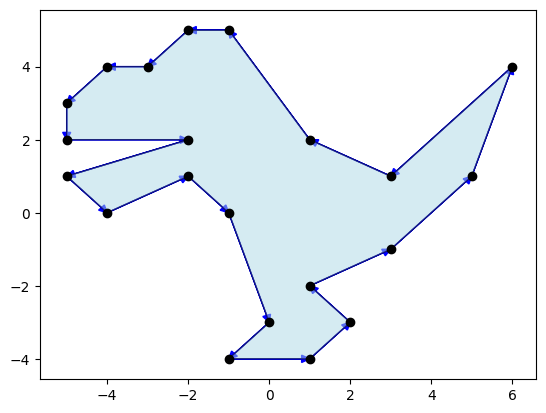

In [1]:
from abstractions import Plot, Point, Vector, Polygon

# prepare the data
dino_vectors = (
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
)

grid_points = [Point(x, y) for x, y in dino_vectors]
grid_vectors = [
    Vector(start, end)
    for start, end in zip(grid_points, grid_points[1:] + [grid_points[0]])
]

point_style = {"marker": "o", "color": "black"}
vector_style = {
    "head_width": 0.2,
    "head_length": 0.2,
    "fc": "blue",
    "ec": "blue",
    "length_includes_head": "True",
}
polygon_style = {"color": "lightblue", "edgecolor": "black", "alpha": 0.5}

# the plotting happens here
fig, ax = (
    Plot()
    .add(grid_points, point_style)
    .add(grid_vectors, vector_style)
    .add(Polygon(grid_points), polygon_style)
    .get_figure()
)

First, we import `Plot`, `Point`, `Vector`, and `Polygon` classes from the `abstractions` module.
* `Plot` is a class that abstracts the common steps of creating a figure.
* `Point` represents a point to draw.
* `Vector` represents a vector to draw.
* `Polygon` represents a polygon to draw.

With this four classes, we can create complex figures with ease.
    
We could ask ourselves a ton of questions, for example:
* How can we resize the figure to the proper size as we've learned in the previous section?
* Can we name the axes?
* I don't generate figures without the title

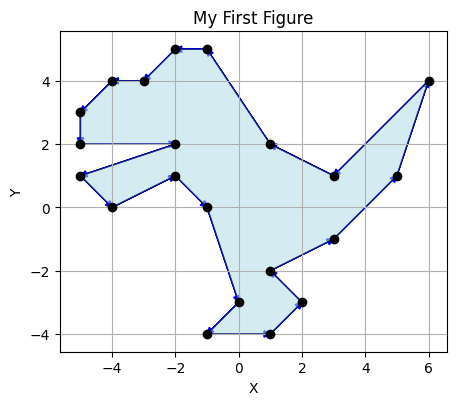

In [2]:
fig.set_size_inches((5, 5))

ax.set_xlabel("X")
ax.set_aspect("equal")
ax.set_ylabel("Y")
ax.set_title("My First Figure")
ax.grid(True)

fig.get_figure()

The secret is that we've abstracted the common steps into a class `Plot` and the common objects into classes `Point`, `Vector`, and `Polygon`.
In the next sections we'll learn how to create these classes.
But for now let's just add a few more examples to fully understand the power of this abstraction.

TO-DO: add linear transformation examples from the math book.

# A little bit of math

v1.start.x=0, v2.end.x=1
x=5, y=7
Vector(Point(0, 0), Point(5, 7))
v1.start.x=0, v2.end.x=1
x=5, y=7


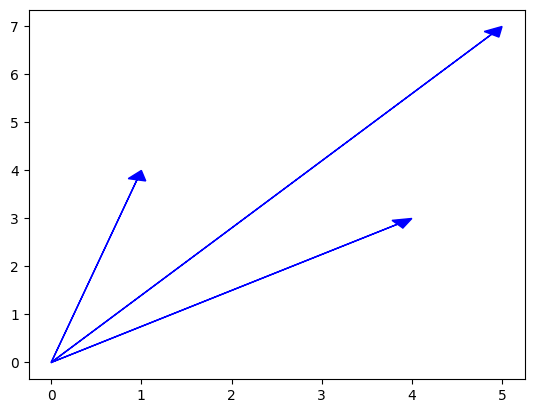

In [3]:
def sum_vectors(v1: Vector, v2: Vector) -> Vector:
    print(f"{v1.start.x=}, {v2.end.x=}")
    x = v1.end.x + v2.end.x
    y = v1.end.y + v2.end.y
    print(f"{x=}, {y=}")
    return Vector(
        Point(v1.start.x + v1.start.x, v1.start.y + v1.start.y),
        Point(v1.end.x + v2.end.x, v1.end.y + v2.end.y),
    )


v1 = Vector(Point(0, 0), Point(4, 3))
v2 = Vector(Point(0, 0), Point(1, 4))

print(f"{sum_vectors(v1, v2)}")

fig, ax = (
    Plot()
    .add([v1, v2], vector_style)
    .add([sum_vectors(v1, v2)], vector_style)
    .get_figure()
)

In [3]:
point = Point(1, 1)
vector = Vector(Point(0, 0), Point(2, 2))
new_point = point.add_vector(vector)
print(new_point)  # Output: Point(3, 3)

Point(3, 3)
